In [95]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import matplotlib.pyplot as plt

In [96]:
def plotImages(images_arr):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    
    plt.show()

In [97]:
train_image_generator = ImageDataGenerator(rescale=1./255,
rotation_range=40,
shear_range=0.2,
horizontal_flip=True,
fill_mode='nearest' )

Found 306 images belonging to 3 classes.


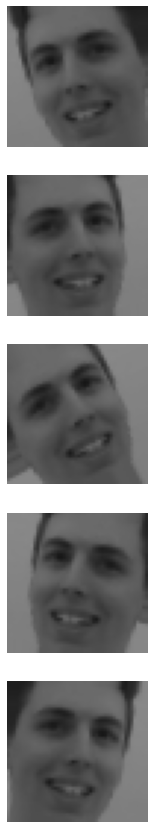

10


In [98]:
IMG_SIZE = 48
train_data_gen = train_image_generator.flow_from_directory(batch_size=10,
                                                     directory="EmotionDataset/Image",
                                                     target_size=(IMG_SIZE, IMG_SIZE),
                                                     class_mode='sparse')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)
print(len(train_data_gen[0][0]))

In [99]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer="adam",loss='sparse_categorical_crossentropy', metrics=["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [103]:
history = model.fit(x=train_data_gen,
                    batch_size=2,
                    epochs=40, 
                    steps_per_epoch=62 // 2)

Epoch 1/40
31/31 [==============================] - 1s 20ms/step - loss: 0.9081 - accuracy: 0.5948
Epoch 2/40
31/31 [==============================] - 1s 20ms/step - loss: 0.8451 - accuracy: 0.6046
Epoch 3/40
31/31 [==============================] - 1s 19ms/step - loss: 0.6954 - accuracy: 0.6993
Epoch 4/40
31/31 [==============================] - 1s 19ms/step - loss: 0.6039 - accuracy: 0.7418
Epoch 5/40
31/31 [==============================] - 1s 20ms/step - loss: 0.5685 - accuracy: 0.7712
Epoch 6/40
31/31 [==============================] - 1s 20ms/step - loss: 0.4564 - accuracy: 0.8366
Epoch 7/40
31/31 [==============================] - 1s 20ms/step - loss: 0.4050 - accuracy: 0.8431
Epoch 8/40
31/31 [==============================] - 1s 20ms/step - loss: 0.3723 - accuracy: 0.8693
Epoch 9/40
31/31 [==============================] - 1s 20ms/step - loss: 0.2926 - accuracy: 0.8987
Epoch 10/40
31/31 [==============================] - 1s 20ms/step - loss: 0.3771 - accuracy: 0.8562
Epoch 11/